<a href="https://colab.research.google.com/github/ajanaferreira/bootcampdataanalytics/blob/main/Frequencias_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalações necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [ ]:
# importando e lendo o df.
df = pd.read_json('enem_2023.json')
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


### 1. Qual das disciplinas tem a maior amplitude de nota?


In [ ]:
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
def describe_new(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    df1.loc["variancia"] = df1.loc['std']*df1.loc['std']
    return df1

describe_new(df)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000
amplitude,517.456317,474.019695,487.604568,488.077902,729.160035
variancia,7057.564698,6054.632515,6203.201190,7507.893239,13303.309244


###**A disciplina com maior amplitude de nota é Redação**

### 2. Qual é a média e a mediana para cada uma das disciplinas?

In [ ]:
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [ ]:
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [ ]:
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median()

,0
Linguagens,515.045250
Ciências humanas,524.519920
Ciências da natureza,500.479263
Matemática,533.247767
Redação,635.273973


### 3. Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [ ]:
dfpesos = df.fillna(0)
dfpesos.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,0.000000,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [ ]:
# Calculando o peso de cada coluna
dfpesos['Linguagens_UFPE'] = dfpesos['Linguagens'].apply(lambda x: x * 2)
dfpesos['Ciências humanas_UFPE'] = dfpesos['Ciências humanas'].apply(lambda x: x * 1)
dfpesos['Ciências da natureza_UFPE'] = dfpesos['Ciências da natureza'].apply(lambda x: x * 1)
dfpesos['Matemática_UFPE'] = dfpesos['Matemática'].apply(lambda x: x * 4)
dfpesos['Redação_UFPE'] = dfpesos['Redação'].apply(lambda x: x * 2)
dfpesos.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Linguagens_UFPE,Ciências humanas_UFPE,Ciências da natureza_UFPE,Matemática_UFPE,Redação_UFPE
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,1171.338599,686.512178,390.482473,1809.125330,1092.743412
1,359.384608,642.084134,0.000000,412.205207,741.825256,Mulher,718.769216,642.084134,0.000000,1648.820827,1483.650511
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,1245.464768,495.510719,443.183580,2678.733603,1369.031501
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,700.329209,602.041588,413.979810,2706.435806,1342.474229
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,768.187315,489.249140,609.758123,2081.706791,1488.750095


In [ ]:
# Calculando todas as colunas, considerando esse peso, para um nova coluna
dfpesos['Total_Notas'] = dfpesos[['Linguagens_UFPE', 'Ciências humanas_UFPE', 'Ciências da natureza_UFPE', 'Matemática_UFPE', 'Redação_UFPE']].sum(axis=1)

# Filtrando os 500 estudantes mais bem colocados.
top_estudantes = dfpesos.nlargest(500, 'Total_Notas')
top_estudantes.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Linguagens_UFPE,Ciências humanas_UFPE,Ciências da natureza_UFPE,Matemática_UFPE,Redação_UFPE,Total_Notas
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,1209.650911,447.532353,523.041011,2908.724897,1740.928154,6829.877324
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,1067.624758,611.760520,494.994598,3231.511608,1395.140426,6801.031909
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,1102.796223,637.818208,451.624683,3215.079752,1305.339272,6712.658138
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,1166.030908,434.261543,588.516699,2750.486846,1704.547641,6643.843636
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,996.789320,668.355060,457.371963,3040.544602,1422.916962,6585.977907


In [ ]:
# Tirando a média dos 500 estudantes mais bem colados.
print(f'A média dos 500 estudantes mais bem colados é de {top_estudantes["Total_Notas"].mean()}')
# Tirando o desvio padrão dos 500 estudantes mais bem colados.
print(f'O desvio padrão dos 500 estudantes mais bem colados é de {top_estudantes["Total_Notas"].std()}')

A média dos 500 estudantes mais bem colados é de 5618.7910649038495
O desvio padrão dos 500 estudantes mais bem colados é de 359.94266397324276


### 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?


In [ ]:
# Colocando a coluna Total_Notas em ordem decrescente, para selecionar os alunos com as maiores notas
df4 = top_estudantes.sort_values(by='Total_Notas', ascending=False)
# Filtrando os 40 alunos com as maiores notas
df_ingressantes = df4.nlargest(40, 'Total_Notas')
df_ingressantes.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Linguagens_UFPE,Ciências humanas_UFPE,Ciências da natureza_UFPE,Matemática_UFPE,Redação_UFPE,Total_Notas
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,1209.650911,447.532353,523.041011,2908.724897,1740.928154,6829.877324
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,1067.624758,611.760520,494.994598,3231.511608,1395.140426,6801.031909
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,1102.796223,637.818208,451.624683,3215.079752,1305.339272,6712.658138
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,1166.030908,434.261543,588.516699,2750.486846,1704.547641,6643.843636
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,996.789320,668.355060,457.371963,3040.544602,1422.916962,6585.977907


In [ ]:
# Tirando a média dos 40 estudantes.
print(f'A média dos 40 estudantes que conseguiram vaga é de {df_ingressantes["Total_Notas"].mean()}')
# Tirando a variância dos 40 estudantes.
print(f'A variância dos 40 estudantes que conseguiram vaga é de {df_ingressantes["Total_Notas"].var()}')

A média dos 40 estudantes que conseguiram vaga é de 6366.827415075188
A variância dos 40 estudantes que conseguiram vaga é de 29576.75036004102


### 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
# Considerado o número de estudantes inicial.
df5 = df[['Matemática', 'Linguagens']].describe()
print("O Terceiro quartil das disciplinas é (75%):", df5.loc['75%'])

O Terceiro quartil das disciplinas é (75%): Matemática    592.912963
Linguagens    571.635876
Name: 75%, dtype: float64


### 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

<Axes: >

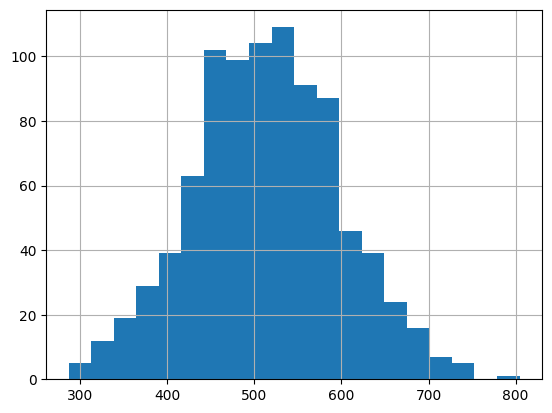

In [ ]:
df.Linguagens.hist(bins=20)

<Axes: >

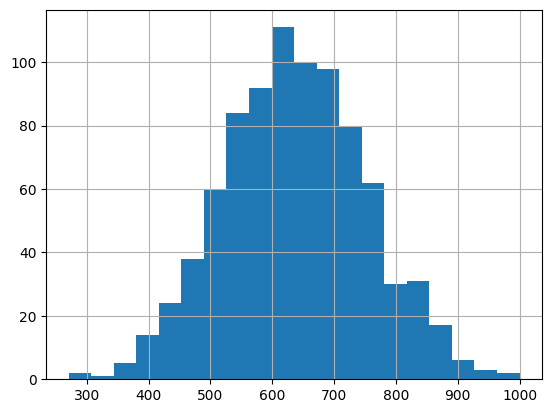

In [ ]:
df.Redação.hist(bins=20)

<Axes: >

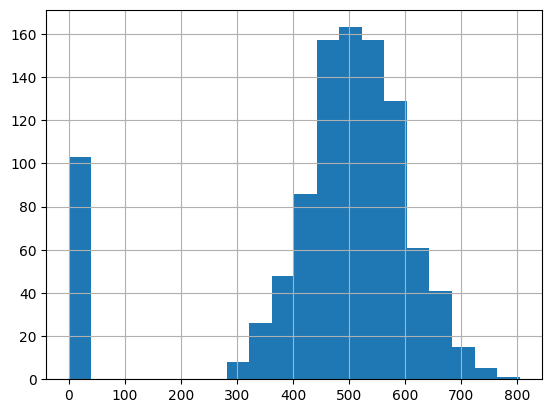

In [ ]:
dfpesos.Linguagens.hist(bins=20)

<Axes: >

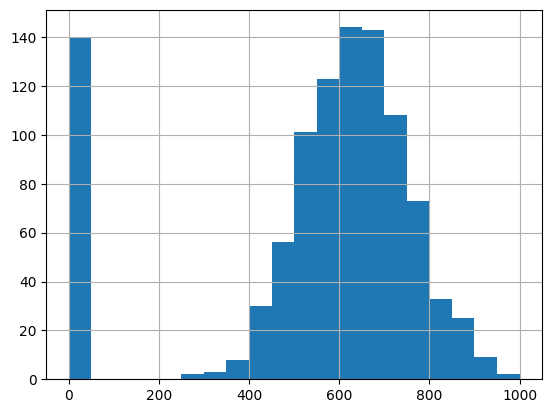

In [ ]:
dfpesos.Redação.hist(bins=20)

###**Considerando os valores vazios temos gráficos simétricos, e trocando os vazios por 0 temos gráficos simétricos com outliers.**

### 7. Colocando um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria?

(array([  0.,   0.,   0.,   0.,   0.,   2.,   3.,   8.,  30.,  56., 101.,
        123., 144., 143., 108.,  73.,  33.,  25.,   9.,   2.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

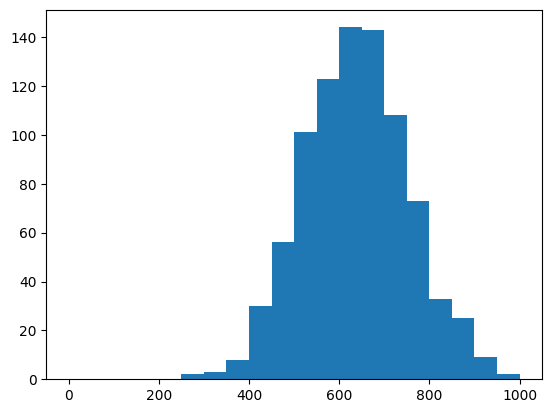

In [ ]:
plt.hist(df['Redação'], bins=20, range=[0,1000])

(array([  0.,   0.,   0.,   0.,   0.,   2.,  20.,  55., 116., 198., 205.,
        167.,  81.,  40.,  11.,   1.,   1.,   0.,   0.,   0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

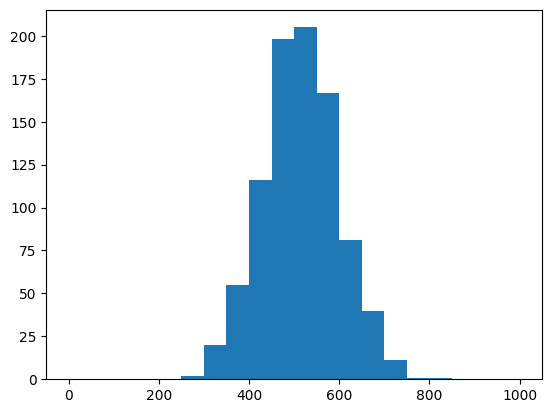

In [ ]:
plt.hist(df['Linguagens'], bins=20, range=[0,1000])

###**A simetria não mudou com o range.**

### 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers?

In [ ]:
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [ ]:
df = df.fillna(0)
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,0.000000,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


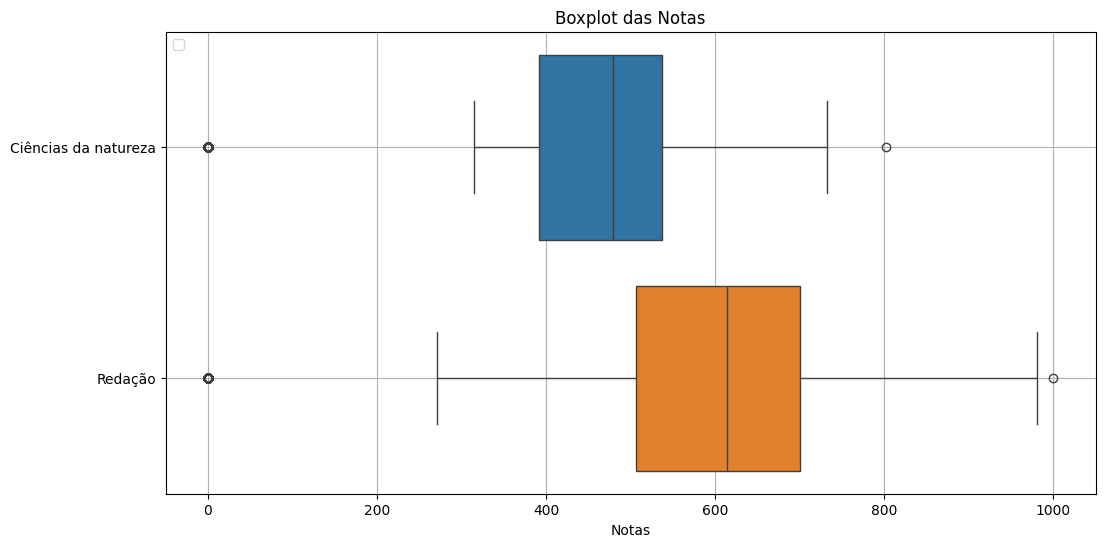

In [ ]:
df9 = df[['Ciências da natureza', 'Redação']]
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df9, orient='h')

def add_iqr_lines(data, ax, column_name, color):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    ax.axvline(Q1, color=color, linestyle='--', label=f'Q1 {column_name}')
    ax.axvline(Q3, color=color, linestyle='--', label=f'Q3 {column_name}')
    ax.axvline(Q1 - 1.5 * IQR, color=color, linestyle=':', label=f'Limite Inferior {column_name}')
    ax.axvline(Q3 + 1.5 * IQR, color=color, linestyle=':', label=f'Limite Superior {column_name}')

plt.title('Boxplot das Notas')
plt.xlabel('Notas')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


###**Nesse boxplot conseguimos verificar que há outliers, inclusive com grande distância para menos.**



### 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente?

In [ ]:
def remove_outliers(df):
    resultado9 = {}

    for column in df.columns:
        # Certificando se que a coluna é numérica
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identificando e remover outliers
            df_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

            # Calculando médias
            media_anterior = df[column].mean()
            media_posterior = df_clean[column].mean()

            # Calculando alteração percentual na média
            percentual_media = ((media_posterior - media_anterior) / media_anterior) * 100

            # Armazenando resultados
            resultado9[column] = {
                'Média Anterior': media_anterior,
                'Média Posterior': media_posterior,
                'Percentual de Alteração das Médias': percentual_media,
                'Alteração Significativa': abs(percentual_media) > 5
            }
        else:
            resultado9[column] = {
                'Média Anterior': None,
                'Média Posterior': None,
                'Percentual de Alteração das Médias': None,
                'Alteração Significativa': None,
                'Aviso': 'Coluna não numérica'
            }

    return resultado9

resultados = remove_outliers(df)

# Exibindo resultados
if resultados:
    for coluna, resultado in resultados.items():
        print(f"Coluna: {coluna}")
        if resultado['Média Anterior'] is not None:
            print(f"Média Anterior: {resultado['Média Anterior']:.2f}")
            print(f"Média Posterior: {resultado['Média Posterior']:.2f}")
            print(f"Percentual de Alteração das Médias: {resultado['Percentual de Alteração das Médias']:.2f}%")
            print(f"Alteração Significativa (>5%): {'Sim' if resultado['Alteração Significativa'] else 'Não'}")
        else:
            print(resultado['Aviso'])
        print()
else:
    print("Nenhum resultado foi retornado. Verifique o DataFrame e a função.")

Coluna: Linguagens
Média Anterior: 461.53
Média Posterior: 514.20
Percentual de Alteração das Médias: 11.41%
Alteração Significativa (>5%): Sim

Coluna: Ciências humanas
Média Anterior: 493.31
Média Posterior: 526.55
Percentual de Alteração das Médias: 6.74%
Alteração Significativa (>5%): Sim

Coluna: Ciências da natureza
Média Anterior: 411.44
Média Posterior: 498.95
Percentual de Alteração das Médias: 21.27%
Alteração Significativa (>5%): Sim

Coluna: Matemática
Média Anterior: 495.23
Média Posterior: 535.11
Percentual de Alteração das Médias: 8.05%
Alteração Significativa (>5%): Sim

Coluna: Redação
Média Anterior: 548.49
Média Posterior: 637.36
Percentual de Alteração das Médias: 16.20%
Alteração Significativa (>5%): Sim

Coluna: Sexo
Coluna não numérica



### 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,461.528754,493.311575,411.436040,495.232270,548.493838
std,175.538016,149.409345,203.232254,164.710061,245.891953
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,433.309645,460.724149,391.045327,456.895163,505.845900
50%,501.782864,517.579368,478.853382,527.787215,613.490219
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
df_nulosmedia= df.fillna(df_media)

df_nulosmedia.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,461.528754,493.311575,411.436040,495.232270,548.493838
std,175.538016,149.409345,203.232254,164.710061,245.891953
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,433.309645,460.724149,391.045327,456.895163,505.845900
50%,501.782864,517.579368,478.853382,527.787215,613.490219
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
df_nulosmediana= df.fillna(df_mediana)

df_nulosmediana.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,461.528754,493.311575,411.436040,495.232270,548.493838
std,175.538016,149.409345,203.232254,164.710061,245.891953
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,433.309645,460.724149,391.045327,456.895163,505.845900
50%,501.782864,517.579368,478.853382,527.787215,613.490219
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
df_nulosmoda= df.fillna(df_moda)

df_nulosmoda.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,461.528754,493.311575,411.436040,495.232270,548.493838
std,175.538016,149.409345,203.232254,164.710061,245.891953
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,433.309645,460.724149,391.045327,456.895163,505.845900
50%,501.782864,517.579368,478.853382,527.787215,613.490219
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


###**Troquei todos os nulos pela media, mediana e moda, mas no resumo estatístico parece que não houve alteração.**